# Introduction

Hello from my new project. In this project, I made real the works on classification models of Machine Learning. The project comprises part one and part two. I created three datasets in the first chapter of part one and visualized them. In the second chapter of part one, I applied machine learning models on created the three datasets and then visualize the results of the models. In part two, I created the functions of the work we did in part one. In this functions, I made real both data creation and classification and then visualized the results of the models. My reason why I did this project is to examine the results of machine learning models on the same data sets. At the same time, I am improving myself in topics of artificial intelligence, and in this improving path, I make projects. This project is one of the projects I have done to improve myself.

# Content<a id = "cont"></a>
- [Create Dataset](#1)
- [Part 1 ](#2)
    - [Datasets With Machine Learning Models](#2a)<br>
        - [Create ML Models](#2a1)
        - [Classification With ML Models](#2a2)
- [Part 2 - Create Function -](#3)
    - [Classification Data 1](#3a)
    - [Moon Data And Classification Data 2](#3b)
    - [Circle Data And Classification Data 3 ](#3c)

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

# İgnore warning
import warnings
warnings.filterwarnings("ignore")

# Create Dataset <a id = "1"></a>
[Go Content](#cont)

In this chapter, I created three datasets and visualized them.

In [2]:
# Variables of datasets

# For All Data
random_state = 42
n_samples = 2000

# For Classification Data
n_features = 3
n_classes = 2
noise_class = 0.3

# For Moon Data
noise_moon = 0.3

# For Circle Data
noise_circle = 0.3


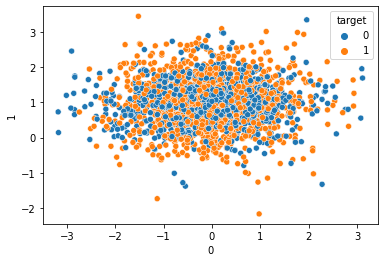

In [3]:
# Data 1

X, y = make_classification(n_samples = n_samples,
                           n_features = n_features,
                           n_classes = n_classes,
                           n_repeated = 0,
                           n_redundant = 0,
                           n_informative = n_features - 1,
                           random_state = random_state,
                           n_clusters_per_class= 1,
                           flip_y = noise_class)

dataClassification = pd.DataFrame(X)
dataClassification["target"] = y
plt.figure()
sns.scatterplot(x = dataClassification.iloc[:,0], y = dataClassification.iloc[:,1], hue = "target", data = dataClassification)

data_classification = (X,y)

In [4]:
dataClassification

0         1         2  target
0    -0.184146  0.857332  0.799950       1
1    -0.565576  0.568315 -0.836893       0
2    -0.033925  0.408471 -0.822467       0
3    -0.686715  0.987632  1.088712       1
4    -1.274232  1.463599 -1.226456       1
...        ...       ...       ...     ...
1995  0.797844  1.618072 -0.584416       0
1996 -0.603859  1.070082  1.066773       1
1997 -0.497962  0.453499  0.279142       1
1998  2.042070  1.607746 -3.031704       0
1999 -1.851843  0.002582 -1.145557       0

[2000 rows x 4 columns]

<AxesSubplot:xlabel='Moon1', ylabel='Moon2'>

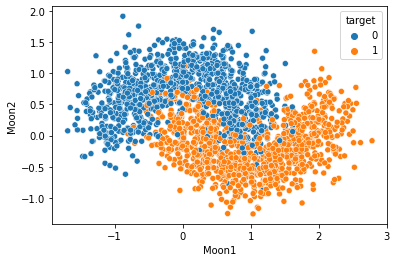

In [5]:
# Data 2

moon = make_moons(n_samples = n_samples, noise=noise_moon, random_state= random_state)

Moondata = pd.DataFrame(moon[0], columns = ["Moon1","Moon2"])
Moondata["target"] = moon[1]
plt.figure()
sns.scatterplot(x = Moondata.iloc[:,0], y = Moondata.iloc[:,1], hue = "target", data = Moondata)

In [6]:
Moondata

Moon1     Moon2  target
0     1.517571  0.424917       1
1     0.304268  0.999691       0
2     0.485924 -0.222913       1
3    -0.933579 -0.093579       0
4     0.684210 -0.436912       1
...        ...       ...     ...
1995  0.295214  0.108314       1
1996  0.356255 -0.425519       1
1997 -0.997532  0.737404       0
1998  0.772409 -0.894220       1
1999  0.300576  0.052587       1

[2000 rows x 3 columns]

<AxesSubplot:xlabel='Circle1', ylabel='Circle2'>

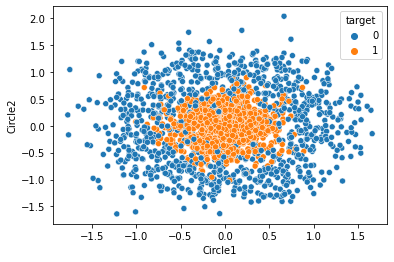

In [7]:
# Data 3

circle = make_circles(n_samples = n_samples, factor = 0.1, noise = noise_circle, random_state= random_state)

Circledata = pd.DataFrame(circle[0], columns = ["Circle1", "Circle2"])
Circledata["target"] = circle[1]
plt.figure()
sns.scatterplot(x = Circledata.iloc[:,0], y = Circledata.iloc[:,1], hue = "target", data = Circledata)

In [8]:
Circledata

Circle1   Circle2  target
0    -0.324662  0.271197       1
1    -0.743240  0.901746       0
2    -0.063895  0.229819       1
3     0.850127 -0.946981       0
4     0.274620 -0.051114       1
...        ...       ...     ...
1995  0.281260  0.078734       1
1996 -0.068849 -0.030964       1
1997  0.545867 -0.456440       0
1998 -0.197273 -0.376842       1
1999  0.293361  0.009691       1

[2000 rows x 3 columns]

# Part 1 <a id = "2"></a>
[Go Content](#cont)

In this chapter, I created machine learning models and then applied models to datasets.

## Datasets With Machine Learning Models <a id = "2a"></a>

### Create ML Models <a id = "2a1"></a>

In this chapter, I created models.

In [9]:
# Variables of models
n_estimators = 10
test_size = .3

# Machine Learning Models
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 15)
dtc = DecisionTreeClassifier(random_state = random_state, max_depth = 2)
rf = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state, max_depth = 2)
ada = AdaBoostClassifier(base_estimator=dtc, n_estimators= n_estimators, random_state= random_state)
v1 = VotingClassifier(estimators = [('svc',svc),('knn',knn),('dt',dtc),('rf',rf),('ada',ada)])
gnb = GaussianNB()

# ML List
names = ["svc","knn","dtc","Random Forest","Ada Bust","Voting","GaussianNB"]
classifier = [svc, knn, dtc, rf, ada, v1, gnb]

# Datasets List
datasets = [moon, circle]
data_name = ["Moon", "Circle"]

### Classification With ML Models <a id = "2a2"></a>
[Go Content](#cont)

In this chapter, I applied the models to the dataset and then visualized the results of the models.

Dataset # Data_Classification
svc: test set score: 0.8066666666666666
svc: train set score: 0.8278571428571428

knn: test set score: 0.8016666666666666
knn: train set score: 0.8264285714285714

dtc: test set score: 0.7933333333333333
dtc: train set score: 0.8085714285714286

Random Forest: test set score: 0.7883333333333333
Random Forest: train set score: 0.8114285714285714

Ada Bust: test set score: 0.81
Ada Bust: train set score: 0.8428571428571429

Voting: test set score: 0.8133333333333334
Voting: train set score: 0.8264285714285714

GaussianNB: test set score: 0.795
GaussianNB: train set score: 0.8107142857142857

----------------------------------------
Dataset # Moon
svc: test set score: 0.9133333333333333
svc: train set score: 0.9133333333333333

knn: test set score: 0.8983333333333333
knn: train set score: 0.8983333333333333

dtc: test set score: 0.8916666666666667
dtc: train set score: 0.8916666666666667

Random Forest: test set score: 0.8816666666666667
Random Forest: train 

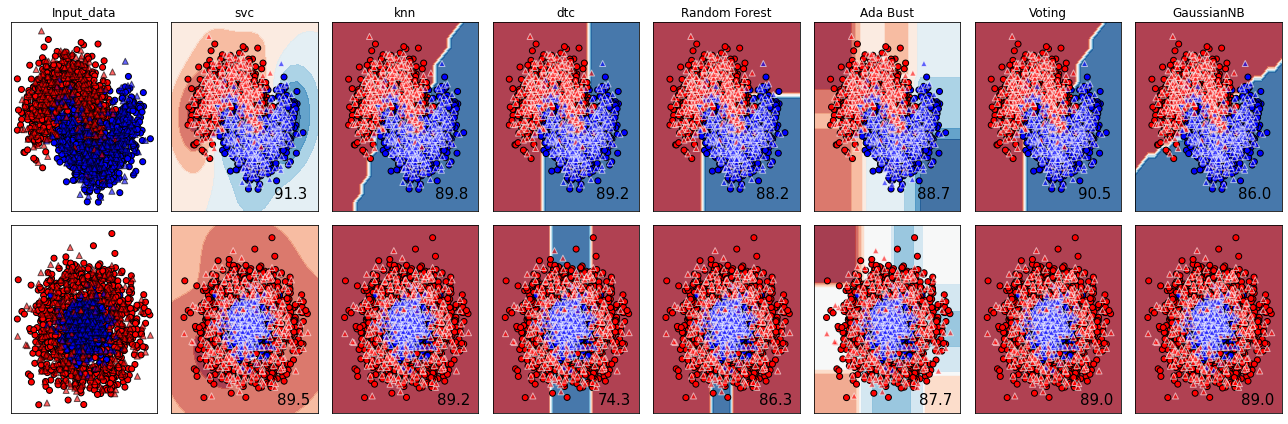

In [10]:
def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = test_size, random_state = random_state)
    
    for name, clf in zip(names, classifier):
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()
    print("----------------------------------------")
    
print("Dataset # Data_Classification")
make_classify(data_classification, classifier, names)

h = 0.2
i = 1
figure = plt.figure(figsize=(18,6))
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into traning and test part
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000","#0000FF"])

    ax = plt.subplot(len(datasets), len(classifier) + 1, i)

    if ds_cnt == 0:
        ax.set_title("Input_data")

    ax.scatter(X_train[:,0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # Plot the testing point
    ax.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = cm_bright, alpha = 0.6, marker = "^", edgecolors = "k")
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    print("Dataset # {}".format(data_name[ds_cnt]))

    for name, clf in zip(names, classifier):
        ax = plt.subplot(len(datasets), len(classifier) + 1, i)
        
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        print("{}: test set score: {}".format(name, score))
        
        score_train = clf.score(X_train, y_train)

        print("{}: train set score: {}".format(name, score))
        print()

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap = cm, alpha = .8)
        
        # Plot the testing points
        ax.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "k")
        # Plot the testing points
        ax.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = cm_bright, marker = "^", edgecolors = "white", alpha = 0.6)
        
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ("%.1f" % score), size = 15, horizontalalignment = "right")
        i += 1
    print ("----------------------------------------")

plt.tight_layout()
plt.show()

# Part 2 - Create Function - <a id = "3"></a>
[Go Content](#cont)

In this chapter, I created functions.

## Classification Data 1 <a id = "3a"></a>
[Go Content](#cont)

In this chapter, I created the first function. This first function comprises the first dataset.

In [11]:
def Classification_Data1(n_samples, n_features, n_classes, random_state, noise_class):
    X, y = make_classification(n_samples = n_samples,
                               n_features = n_features,
                               n_classes = n_classes,
                               n_repeated = 0,
                               n_redundant = 0,
                               n_informative = n_features - 1,
                               random_state = random_state,
                               n_clusters_per_class= 1,
                               flip_y = noise_class)
    

    data = pd.DataFrame(X)
    data["target"] = y
    plt.figure()
    sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data)
    plt.title("Classification Data 1")
    plt.show()
    
    print("----------------------------------------")
    
    data_classification = (X,y)
    
    x, y = data_classification
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = test_size, random_state = random_state)
    
    for name, clf in zip(names, classifier):
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()
    print("----------------------------------------")
    
    
    
    # make_classify(data_classification, classifier, names)

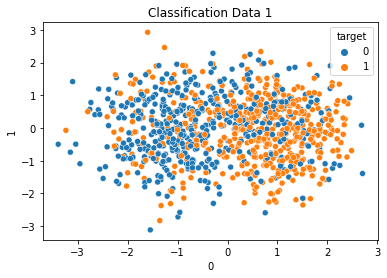

----------------------------------------
svc: test set score: 0.66
svc: train set score: 0.7114285714285714

knn: test set score: 0.6333333333333333
knn: train set score: 0.7171428571428572

dtc: test set score: 0.6633333333333333
dtc: train set score: 0.7014285714285714

Random Forest: test set score: 0.6466666666666666
Random Forest: train set score: 0.6942857142857143

Ada Bust: test set score: 0.6166666666666667
Ada Bust: train set score: 0.75

Voting: test set score: 0.66
Voting: train set score: 0.7085714285714285

GaussianNB: test set score: 0.67
GaussianNB: train set score: 0.6828571428571428

----------------------------------------


In [12]:
Classification_Data1(1000, 3, 2, 0, 0.5)

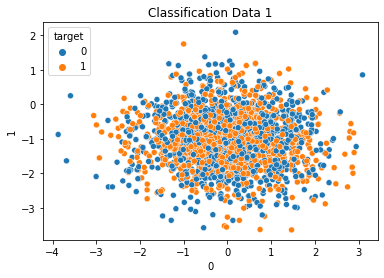

----------------------------------------
svc: test set score: 0.71
svc: train set score: 0.7142857142857143

knn: test set score: 0.6933333333333334
knn: train set score: 0.7142857142857143

dtc: test set score: 0.6516666666666666
dtc: train set score: 0.6778571428571428

Random Forest: test set score: 0.6683333333333333
Random Forest: train set score: 0.6864285714285714

Ada Bust: test set score: 0.6683333333333333
Ada Bust: train set score: 0.7207142857142858

Voting: test set score: 0.6916666666666667
Voting: train set score: 0.7092857142857143

GaussianNB: test set score: 0.675
GaussianNB: train set score: 0.6892857142857143

----------------------------------------


In [13]:
Classification_Data1(2000, 4, 2, 0, 0.5)

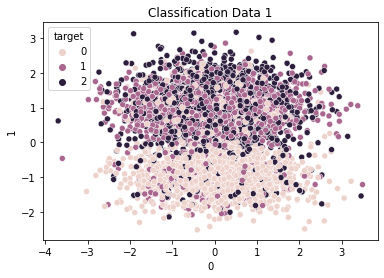

----------------------------------------
svc: test set score: 0.8046666666666666
svc: train set score: 0.786

knn: test set score: 0.798
knn: train set score: 0.7851428571428571

dtc: test set score: 0.7166666666666667
dtc: train set score: 0.706

Random Forest: test set score: 0.724
Random Forest: train set score: 0.7017142857142857

Ada Bust: test set score: 0.79
Ada Bust: train set score: 0.7688571428571429

Voting: test set score: 0.7926666666666666
Voting: train set score: 0.774

GaussianNB: test set score: 0.7386666666666667
GaussianNB: train set score: 0.718

----------------------------------------


In [14]:
Classification_Data1(5000, 3, 3, 0, 0.3)

## Moon Data And Classification Data 2 <a id = "3b"></a>
[Go Content](#cont)

In this chapter, I created the second function. This second function comprises the moon dataset.

In [15]:
def moon_classify(n_samples, noise_moon, random_state):
    moon = make_moons(n_samples = n_samples, noise=noise_moon, random_state= random_state)

    Moondata = pd.DataFrame(moon[0], columns = ["Moon1","Moon2"])
    Moondata["target"] = moon[1]
    plt.figure()
    sns.scatterplot(x = Moondata.iloc[:,0], y = Moondata.iloc[:,1], hue = "target", data = Moondata)
    plt.title("Moon Data")
    plt.show()
    
    print("----------------------------------------")
    
    h = 0.2
    i = 1
    figure = plt.figure(figsize=(18,6))
    # preprocess dataset, split into traning and test part
    X, y = moon
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000","#0000FF"])

    ax = plt.subplot(len(datasets), len(classifier) + 1, i)

    if 0 == 0:
        ax.set_title("Input_data")

    ax.scatter(X_train[:,0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # Plot the testing point
    ax.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = cm_bright, alpha = 0.6, marker = "^", edgecolors = "k")
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    print("Dataset # {}".format(data_name[ds_cnt]))

    for name, clf in zip(names, classifier):
        ax = plt.subplot(len(datasets), len(classifier) + 1, i)
        
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        print("{}: test set score: {}".format(name, score))
        
        score_train = clf.score(X_train, y_train)

        print("{}: train set score: {}".format(name, score))
        print()

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap = cm, alpha = .8)
        
        # Plot the testing points
        ax.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "k")
        # Plot the testing points
        ax.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = cm_bright, marker = "^", edgecolors = "white", alpha = 0.6)
        
        ax.set_xticks(())
        ax.set_yticks(())
        if 0 == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ("%.1f" % score), size = 15, horizontalalignment = "right")
        i += 1
    print ("----------------------------------------")

    plt.tight_layout()
    plt.show()

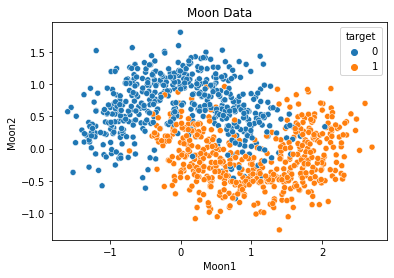

----------------------------------------
Dataset # Circle
svc: test set score: 0.8933333333333333
svc: train set score: 0.8933333333333333

knn: test set score: 0.9066666666666666
knn: train set score: 0.9066666666666666

dtc: test set score: 0.8733333333333333
dtc: train set score: 0.8733333333333333

Random Forest: test set score: 0.87
Random Forest: train set score: 0.87

Ada Bust: test set score: 0.8966666666666666
Ada Bust: train set score: 0.8966666666666666

Voting: test set score: 0.8966666666666666
Voting: train set score: 0.8966666666666666

GaussianNB: test set score: 0.8133333333333334
GaussianNB: train set score: 0.8133333333333334

----------------------------------------


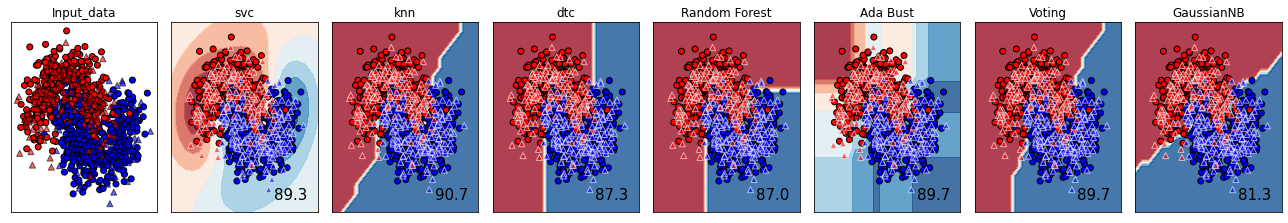

In [16]:
moon_classify(1000, 0.3, 0)

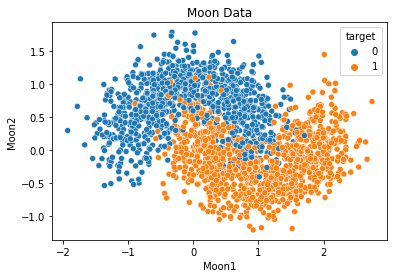

----------------------------------------
Dataset # Circle
svc: test set score: 0.9033333333333333
svc: train set score: 0.9033333333333333

knn: test set score: 0.9066666666666666
knn: train set score: 0.9066666666666666

dtc: test set score: 0.875
dtc: train set score: 0.875

Random Forest: test set score: 0.87
Random Forest: train set score: 0.87

Ada Bust: test set score: 0.895
Ada Bust: train set score: 0.895

Voting: test set score: 0.9033333333333333
Voting: train set score: 0.9033333333333333

GaussianNB: test set score: 0.8366666666666667
GaussianNB: train set score: 0.8366666666666667

----------------------------------------


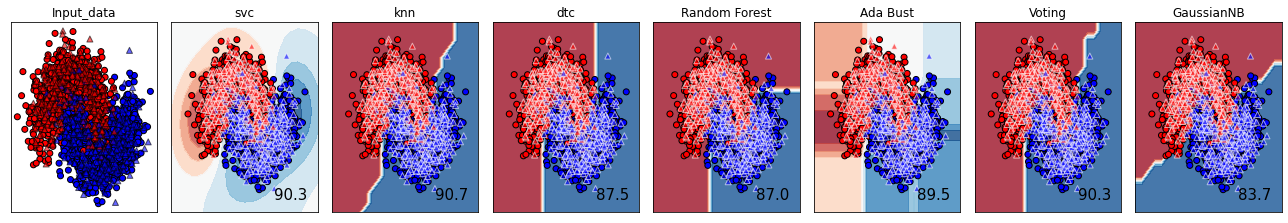

In [17]:
moon_classify(2000, 0.3, 0)

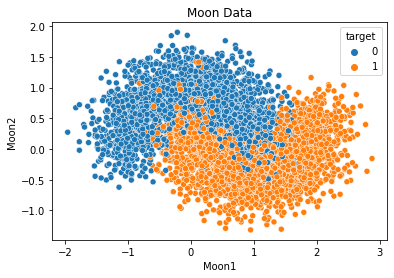

----------------------------------------
Dataset # Circle
svc: test set score: 0.9173333333333333
svc: train set score: 0.9173333333333333

knn: test set score: 0.92
knn: train set score: 0.92

dtc: test set score: 0.898
dtc: train set score: 0.898

Random Forest: test set score: 0.8853333333333333
Random Forest: train set score: 0.8853333333333333

Ada Bust: test set score: 0.9073333333333333
Ada Bust: train set score: 0.9073333333333333

Voting: test set score: 0.912
Voting: train set score: 0.912

GaussianNB: test set score: 0.8553333333333333
GaussianNB: train set score: 0.8553333333333333

----------------------------------------


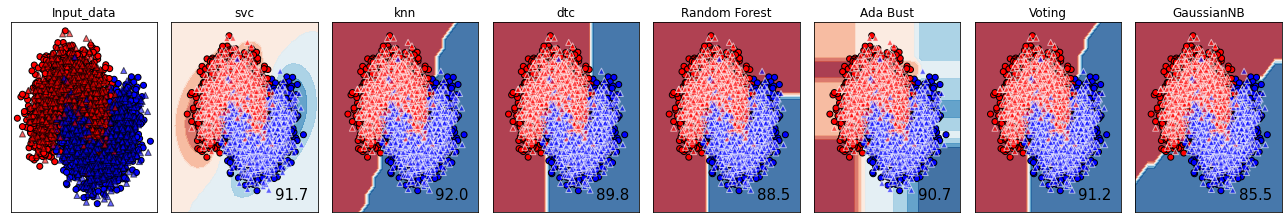

In [18]:
moon_classify(5000, 0.3, 0)

## Circle Data And Classification Data 3 <a id = "3c"></a>
[Go Content](#cont)

In this chapter, I created the third function. This third function comprises the circle dataset.

In [19]:
def Circle_Classify(n_samples, noise_circle, random_state, factor = 0.1):
    circle = make_circles(n_samples = n_samples, factor = factor, noise = noise_circle, random_state= random_state)

    Circledata = pd.DataFrame(circle[0], columns = ["Circle1", "Circle2"])
    Circledata["target"] = circle[1]
    plt.figure()
    sns.scatterplot(x = Circledata.iloc[:,0], y = Circledata.iloc[:,1], hue = "target", data = Circledata)
    plt.title("Circle Data")
    plt.show()
    
    print("----------------------------------------")
    
    h = 0.2
    i = 1
    figure = plt.figure(figsize=(18,6))
    # preprocess dataset, split into traning and test part
    X, y = circle
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000","#0000FF"])

    ax = plt.subplot(len(datasets), len(classifier) + 1, i)

    if 0 == 0:
        ax.set_title("Input_data")

    ax.scatter(X_train[:,0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # Plot the testing point
    ax.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = cm_bright, alpha = 0.6, marker = "^", edgecolors = "k")
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    print("Dataset # {}".format(data_name[ds_cnt]))

    for name, clf in zip(names, classifier):
        ax = plt.subplot(len(datasets), len(classifier) + 1, i)
        
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        print("{}: test set score: {}".format(name, score))
        
        score_train = clf.score(X_train, y_train)

        print("{}: train set score: {}".format(name, score))
        print()

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap = cm, alpha = .8)
        
        # Plot the testing points
        ax.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = cm_bright, edgecolors = "k")
        # Plot the testing points
        ax.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = cm_bright, marker = "^", edgecolors = "white", alpha = 0.6)
        
        ax.set_xticks(())
        ax.set_yticks(())
        if 0 == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ("%.1f" % score), size = 15, horizontalalignment = "right")
        i += 1
    print ("----------------------------------------")

    plt.tight_layout()
    plt.show()

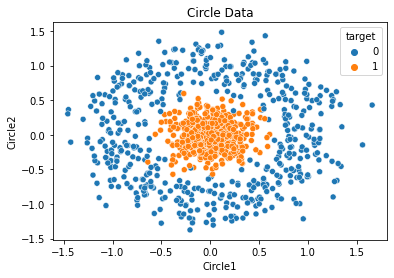

----------------------------------------
Dataset # Circle
svc: test set score: 0.9933333333333333
svc: train set score: 0.9933333333333333

knn: test set score: 0.9866666666666667
knn: train set score: 0.9866666666666667

dtc: test set score: 0.83
dtc: train set score: 0.83

Random Forest: test set score: 0.9
Random Forest: train set score: 0.9

Ada Bust: test set score: 0.98
Ada Bust: train set score: 0.98

Voting: test set score: 0.99
Voting: train set score: 0.99

GaussianNB: test set score: 0.9666666666666667
GaussianNB: train set score: 0.9666666666666667

----------------------------------------


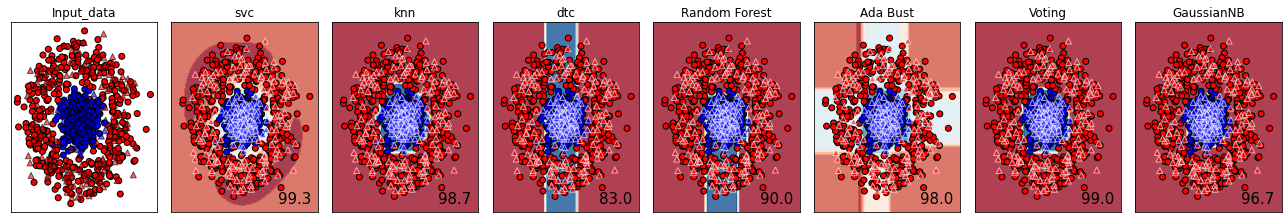

In [20]:
Circle_Classify(1000, 0.2, 0)

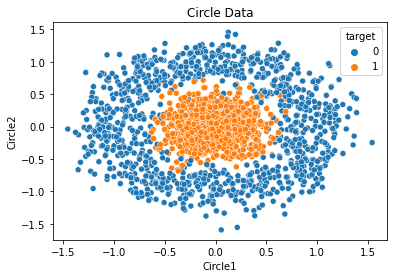

----------------------------------------
Dataset # Circle
svc: test set score: 0.9616666666666667
svc: train set score: 0.9616666666666667

knn: test set score: 0.9633333333333334
knn: train set score: 0.9633333333333334

dtc: test set score: 0.825
dtc: train set score: 0.825

Random Forest: test set score: 0.8933333333333333
Random Forest: train set score: 0.8933333333333333

Ada Bust: test set score: 0.9566666666666667
Ada Bust: train set score: 0.9566666666666667

Voting: test set score: 0.9616666666666667
Voting: train set score: 0.9616666666666667

GaussianNB: test set score: 0.945
GaussianNB: train set score: 0.945

----------------------------------------


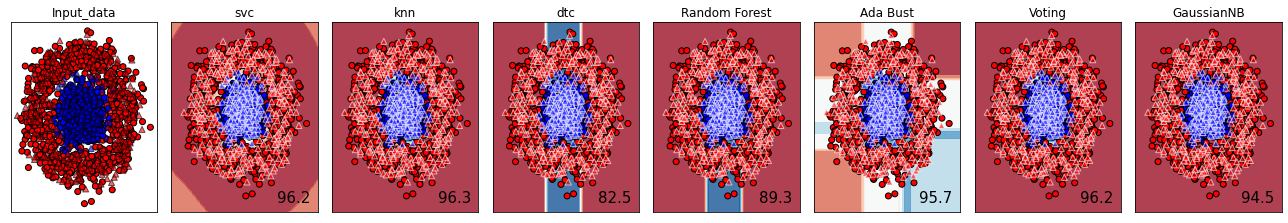

In [21]:
Circle_Classify(2000, 0.2, 0, 0.2)

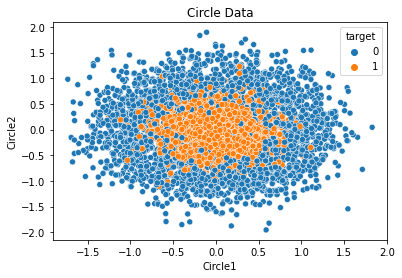

----------------------------------------
Dataset # Circle
svc: test set score: 0.8646666666666667
svc: train set score: 0.8646666666666667

knn: test set score: 0.8693333333333333
knn: train set score: 0.8693333333333333

dtc: test set score: 0.7246666666666667
dtc: train set score: 0.7246666666666667

Random Forest: test set score: 0.8566666666666667
Random Forest: train set score: 0.8566666666666667

Ada Bust: test set score: 0.8653333333333333
Ada Bust: train set score: 0.8653333333333333

Voting: test set score: 0.8593333333333333
Voting: train set score: 0.8593333333333333

GaussianNB: test set score: 0.868
GaussianNB: train set score: 0.868

----------------------------------------


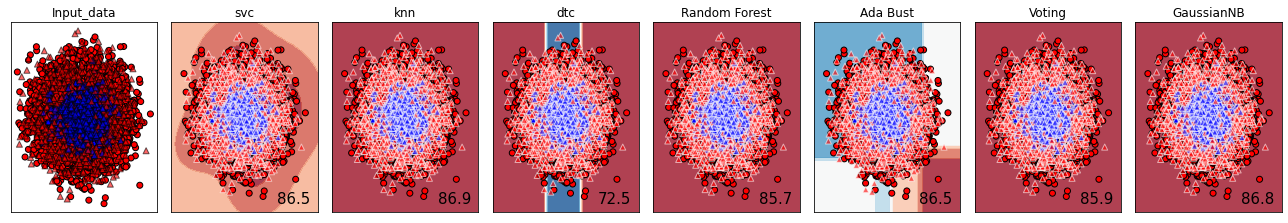

In [22]:
Circle_Classify(5000, 0.3, 0, 0.2)

# CONCLUSION
[Go Content](#cont)

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.